In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('C:/Users/govindd1/Desktop/Code/VR-Project/ACC_data_from_different_subjects/E4_ACC_data.csv')
df = df.drop('round', 1)
df.head()

C:\Users\govindd1\AppData\Local\Temp/ipykernel_175440/905013244.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('round', 1)


,datatime,acc_x,acc_y,acc_z,label,subject_id,type
0,2021-10-27 16:19:17+00:00,-14,22,55,standing,2,MotionLess
1,2021-10-27 16:19:17.031250+00:00,-4,25,61,standing,2,MotionLess
2,2021-10-27 16:19:17.062500+00:00,-7,21,59,standing,2,MotionLess
3,2021-10-27 16:19:17.093750+00:00,-15,20,59,standing,2,MotionLess
4,2021-10-27 16:19:17.125000+00:00,-11,22,66,standing,2,MotionLess


In [14]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['activity'] = label.fit_transform(df['type'])
label.classes_
df

,datatime,acc_x,acc_y,acc_z,label,subject_id,type,activity
0,2021-10-27 16:19:17+00:00,-14,22,55,standing,2,MotionLess,1
1,2021-10-27 16:19:17.031250+00:00,-4,25,61,standing,2,MotionLess,1
2,2021-10-27 16:19:17.062500+00:00,-7,21,59,standing,2,MotionLess,1
3,2021-10-27 16:19:17.093750+00:00,-15,20,59,standing,2,MotionLess,1
4,2021-10-27 16:19:17.125000+00:00,-11,22,66,standing,2,MotionLess,1
...,...,...,...,...,...,...,...,...
137401,2021-10-27 16:25:50.906250+00:00,-24,22,37,walking,3,InMotion,0
137402,2021-10-27 16:25:50.937500+00:00,-20,15,47,walking,3,InMotion,0
137403,2021-10-27 16:25:50.968750+00:00,-10,13,58,walking,3,InMotion,0
137404,2021-10-27 16:25:51+00:00,-11,11,65,walking,3,InMotion,0


In [15]:
from sklearn.preprocessing import StandardScaler

X = df[['acc_x', 'acc_y', 'acc_z']]
y = df['activity']
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # scaled_X = pd.DataFrame(data = X, columns = ['accXmean',	'accYmean',	'accZmean',	'accXstd',	'accYstd',	'accZstd',	'MagnitudeMean', 'covXYmean',	'covYZmean',	'covXZmean'])
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

array([[-1.13600385, -0.14787169,  0.69485428],
       [ 1.29552647,  0.78550642, -1.66238151],
       [-0.67039166, -0.19340233,  1.2104996 ],
       ...,
       [-1.39467728, -0.30722893, -0.07861372],
       [-0.87733041, -0.10234105,  0.69485428],
       [-0.64452431, -0.94465789, -0.04178191]])

Accuracy: 0.7147587511825922

 ------------------------------------------ RandomForestClassifier() Classification Report-------------------------------------------------

              precision    recall  f1-score   support

           0       0.73      0.74      0.74     14897
           1       0.69      0.68      0.69     12585

    accuracy                           0.71     27482
   macro avg       0.71      0.71      0.71     27482
weighted avg       0.71      0.71      0.71     27482

 ------------------------------------------------------  Confusion Matrix ----------------------------------------------------------


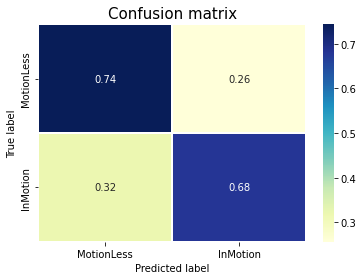

----------------------------------------------  RandomForestClassifier() K-Fold Report  ------------------------------------------------------ 

 * Results: [0.73268804 0.73123249 0.73625414 0.73585386]

 * Average acuracy: 0.7340071322004293 

<--------------------------------------------------------   END   ------------------------------------------------------------------>


In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score



classifiers = [
# KNeighborsClassifier(3),
# SVC(kernel="rbf", C=0.025, probability=True)
# NuSVC(probability=True),
RandomForestClassifier()
# DecisionTreeClassifier()
# AdaBoostClassifier()
# GradientBoostingClassifier()
]
for classifier in classifiers:
# pipe = Pipeline(steps=[('preprocessor', preprocessor),
#                   ('classifier', classifier)])
# pipe.fit(X_train, y_train)   
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\n ------------------------------------------", classifier , "Classification Report-------------------------------------------------\n")
    print(classification_report(y_test, y_pred))    


# K-Fold 
kfold = 4
results = cross_val_score(classifier, X_train, y_train, cv=kfold)


print(" ------------------------------------------------------  Confusion Matrix ----------------------------------------------------------")
# labels = ['walking', 'sitting', 'standing', 'upstairs', 'downstairs']
labels = ['MotionLess', 'InMotion']
_y_test = y_test
_y_pred = y_pred
confusion_matrix = confusion_matrix(_y_test, _y_pred)
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_matrix, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, cmap = "YlGnBu")
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# print(" ------------------------------------------------------ AUC SCORE -------------------------------------------------------------------")
# skplt.metrics.plot_roc_curve(y_test, y_pred)
# plt.show()
    
print("---------------------------------------------- ", classifier , "K-Fold Report  ------------------------------------------------------", "\n")
# print("model score: %.3f" % pipe.score(X_test, y_test))
# print('------------------------------------   REPORT   ----------------------------------', "\n")
print(' * Results: {}'.format(results))
print('\n * Average acuracy: {}'.format(np.mean(results)), "\n")

print('<--------------------------------------------------------   END   ------------------------------------------------------------------>')

In [17]:

y_pred_probabilty = classifier.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_probabilty[:,1]))


0.840640022953002


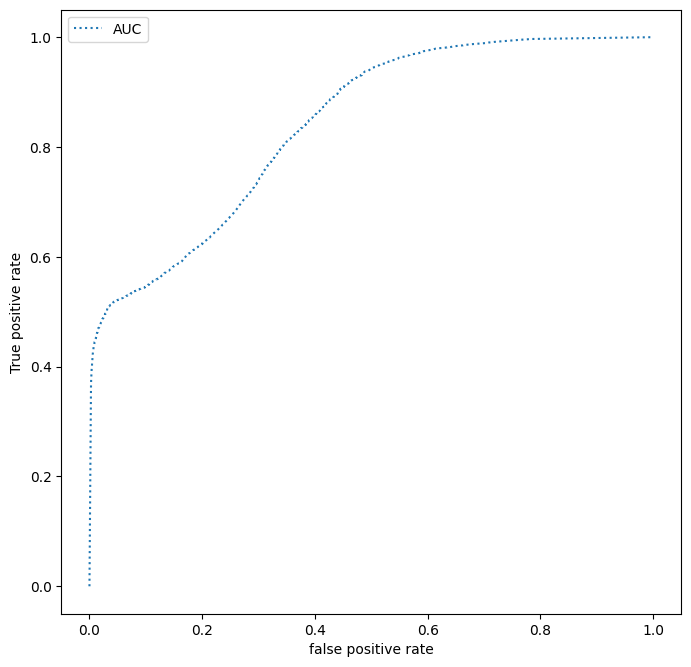

In [23]:

from sklearn.metrics import roc_auc_score, roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, y_pred_probabilty[:,1])
auc = auc(fpr, tpr)

plt.figure(figsize=(8,8), dpi = 100)
plt.plot(fpr, tpr, linestyle = ':', label = 'AUC')

plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.show()
